# Classification  Project

Welcome to the KNN Project! This will be a simple project very similar to the lecture.




## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read the'KNN_Data'csv file into a dataframe.**

In [ ]:
#here i have created a variable Mydata to store the KNN data
Mydata= pd.read_excel('KNN Data.xlsx')

**Check the head of the dataframe.**

In [ ]:
Mydata.head() #this line prints the first 5 lines from my datset

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

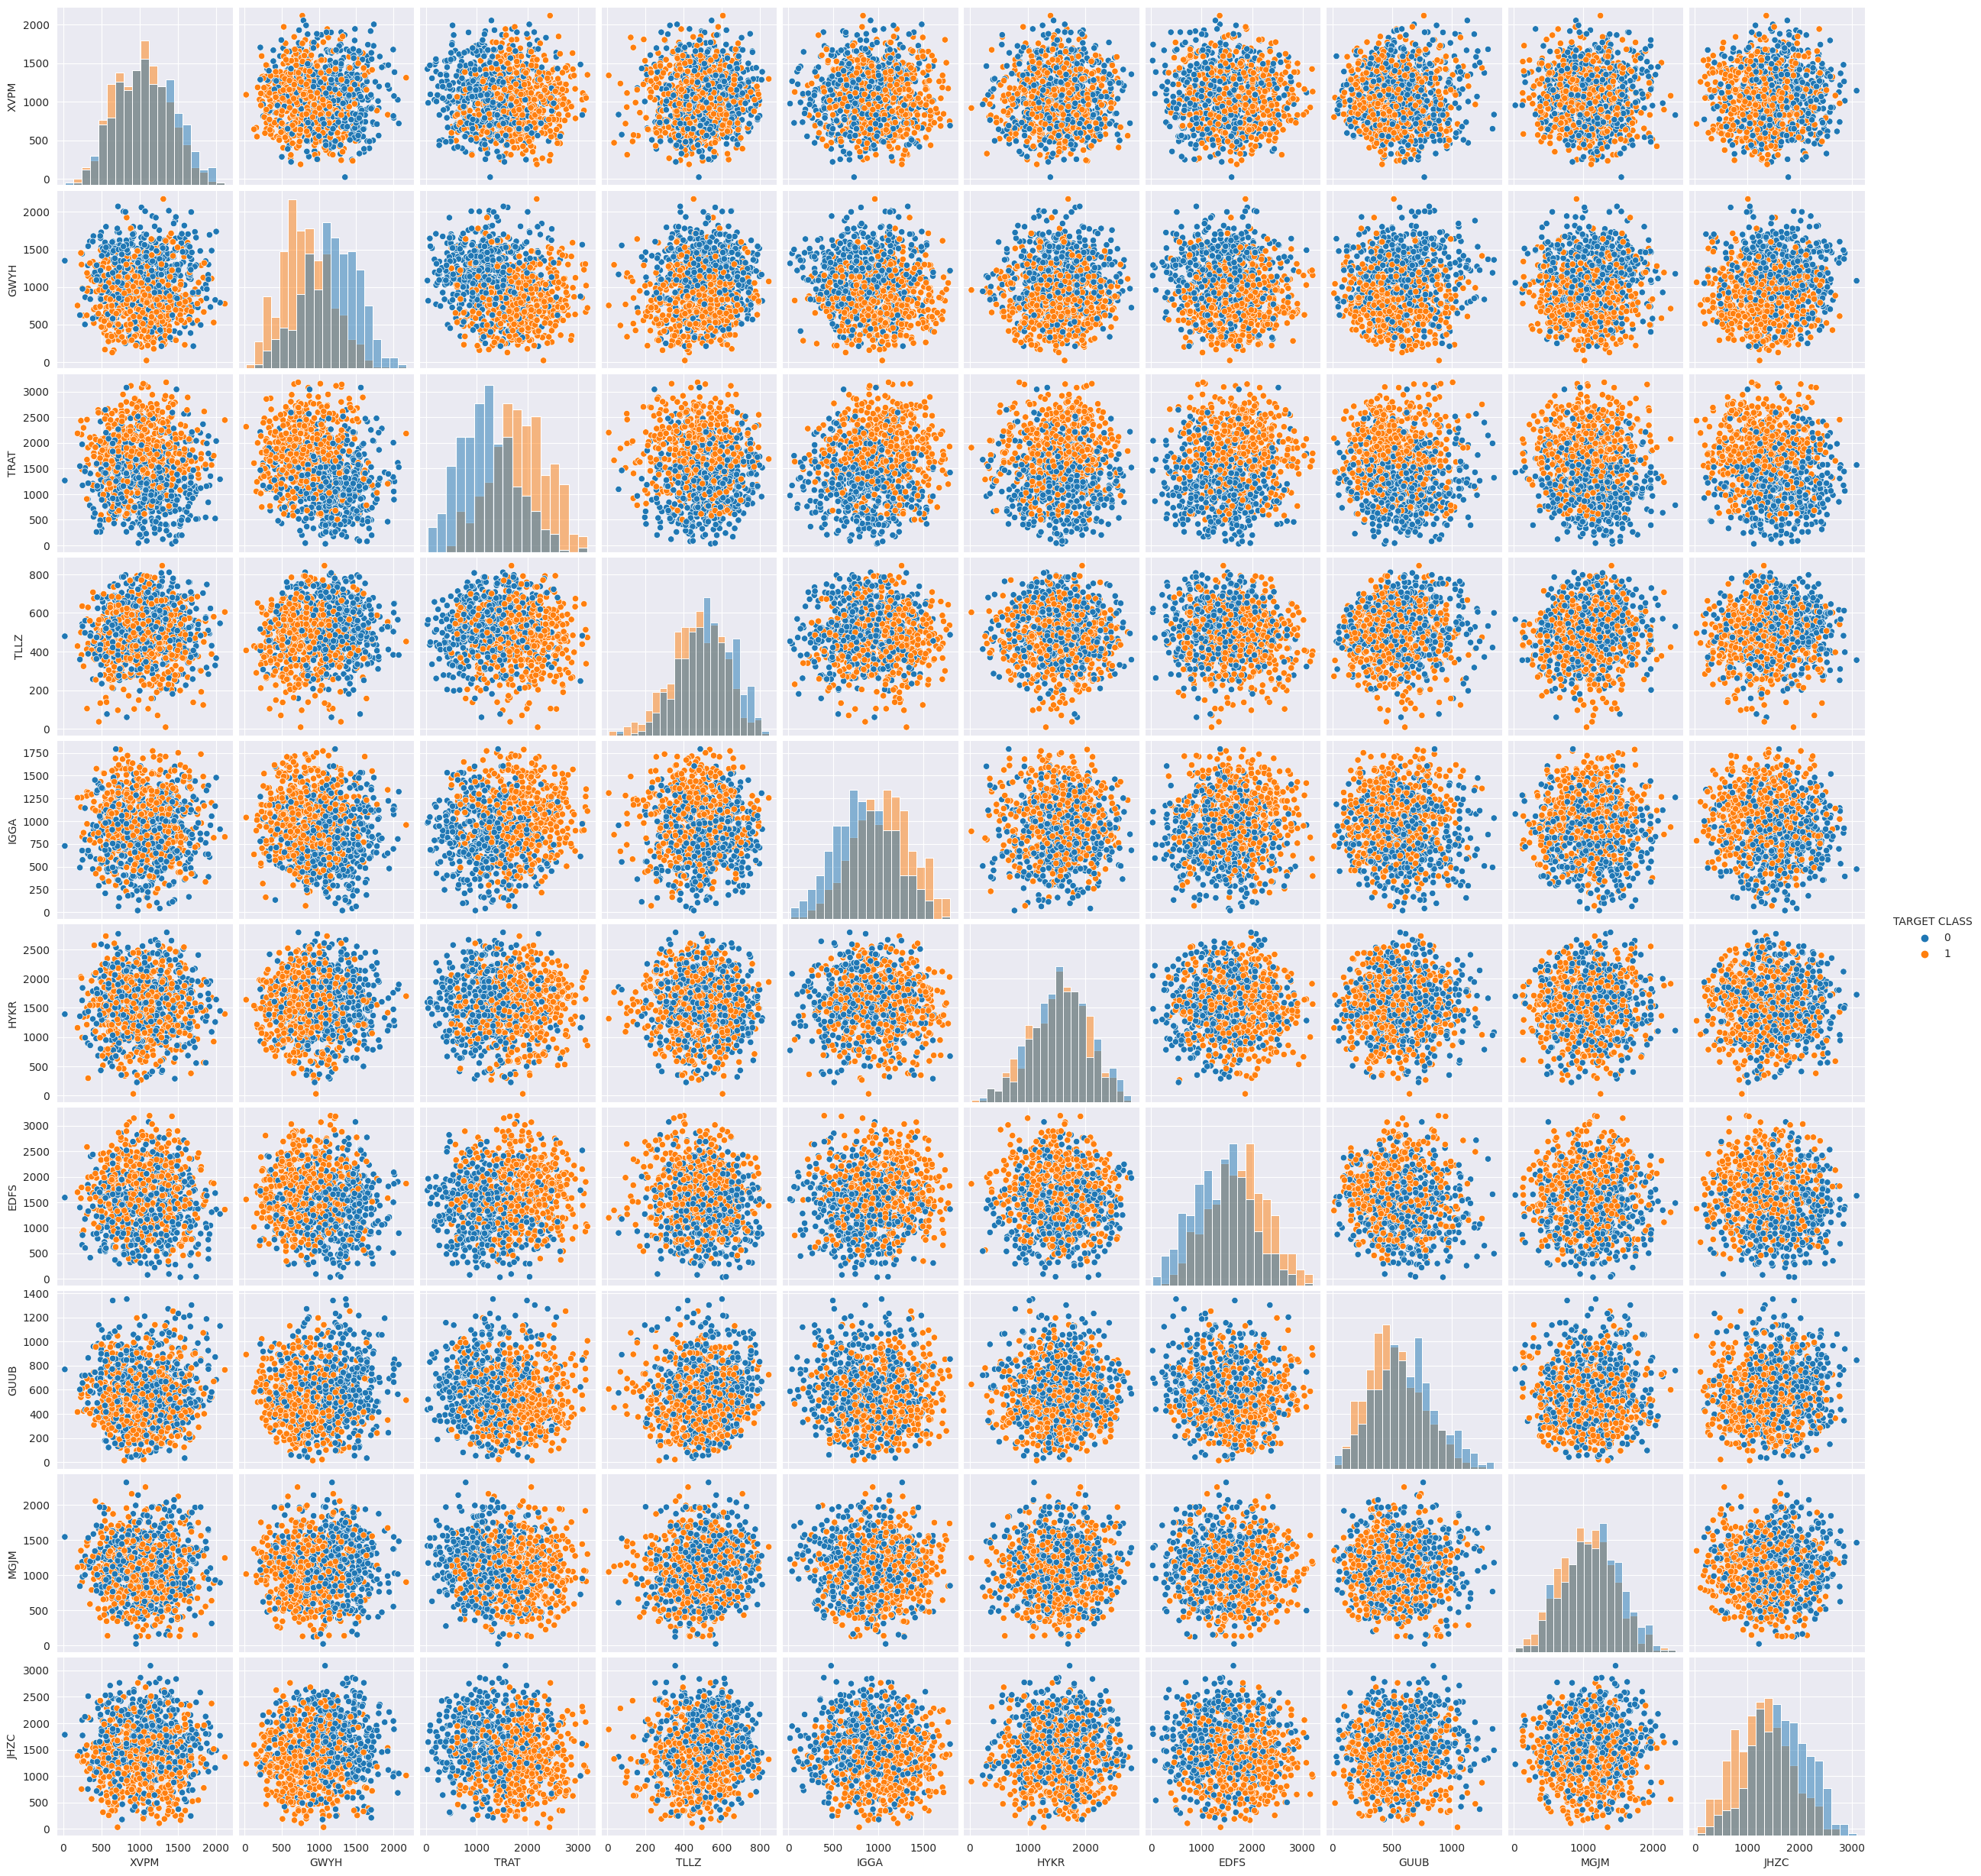

In [ ]:
#Pairplot shows the link between continuous or categorical variables.
#hue - variable(Target class) in data
#For simple comparison and display, a hue parameter pair plot colours data points by category variable.
sns.set_style("darkgrid", {'grid.linewidth':15}) #this line i used for grids and it's width, basically styling
sns.pairplot(Mydata, hue="TARGET CLASS", diag_kind="hist")

# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from Scikit learn.**

In [ ]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [ ]:
#here i have created an object StandardScaler() and named it as scaler
scaler = StandardScaler()

**Fit scaler to the features.**

In [ ]:
x= Mydata.iloc[:, :-1]  #this line select the all the coloumns from Mydata except the hue/last coloumn,basically this is for modeling
y= Mydata.iloc[:, -1]  #this line selects the last column(TARGER CLASS),this coloumn is what we are trying to predict
scaler.fit(x)
#here i have taken the data subsets for the modeling

StandardScaler()

In [ ]:
x.head()    #it only displays the columns stored in f(other than hue)

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088  
1  2084.107872   853.404981  447.157619  1193.032521   861.081809  
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291  
3   685.666983   852.867810  341.664784  1154.391368  1450.935357  
4  1370.554164   905.469453  658.118202   539.459350  1899.850792

In [ ]:
y.head() #it only displays the columns stored in outcome(TARGET CLASSS)

0    0
1    1
2    1
3    0
4    0
Name: TARGET CLASS, dtype: int64

**Use the .transform() method to transform the features to a scaled version.**

In [ ]:
#we use this line to standardize the data in model,and it stored in standardized
scaled = scaler.transform(x)
#use fit_transform() along with the assigned object to transform the data and standardize it.
#here i have standardized or normalizing the data the data

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [ ]:
#i have created a new dataframe
Newdata = pd.DataFrame(scaled, columns=x.columns)
#head() displays the scaled DataFrame's initial rows.
Newdata.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [ ]:
from sklearn.model_selection import train_test_split # i am importing this function to split my dataset into training and testing subsets.
Xg_train, Xg_test, yg_train, yg_test = train_test_split(Newdata, y ,test_size=.25, random_state=43)#here my test data is 25%
#random state shold be fixed in a volume(the split will be same whenever we run the code)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #importing this line for K-Nearest Neighbors (KNN) Algorithm, Machine Learning Model,Supervised Learning,Classification Tasks


**Create a KNN model instance with n_neighbors=1**

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=1, metric='minkowski' ) #minkowski is eucleadian distance

**Fit this KNN model to the training data.**

In [ ]:
#here i am useing fit to train KNN_model on the KNN Data(dataset)
KNN_model.fit(Xg_train, yg_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
KNN_model.score(Xg_test, yg_test) #accuracy

0.736

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [ ]:
Yg_pred=KNN_model.predict(Xg_test) #i have created a Y_pred variable store the prediction of X

** Create a confusion matrix and classification report.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix #Importing these functions simplifies categorization model evaluation.

In [ ]:
print(classification_report(yg_test, Yg_pred)) #this line compares the actuall and predicted coloums ands then give the results as below

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       118
           1       0.74      0.77      0.75       132

    accuracy                           0.74       250
   macro avg       0.74      0.73      0.73       250
weighted avg       0.74      0.74      0.74       250



In [ ]:
c_matrix = confusion_matrix(yg_test, Yg_pred) #draws the confusion matrix for actual predicted coloumns
print(c_matrix) #printing the confusion matrix

[[ 83  35]
 [ 31 101]]


In [ ]:
report = classification_report(yg_test, Yg_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       118
           1       0.74      0.77      0.75       132

    accuracy                           0.74       250
   macro avg       0.74      0.73      0.73       250
weighted avg       0.74      0.74      0.74       250



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [ ]:
from sklearn.metrics import accuracy_score
E_R = []
K_V = range(1, 40)
for k in K_V:
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(Xg_train, yg_train)
    Yg_pred = KNN_model.predict(Xg_test)
    error_rate = 1 - accuracy_score(yg_test, Yg_pred)
    E_R.append(error_rate)

**Now create the following plot using the information from your for loop.**

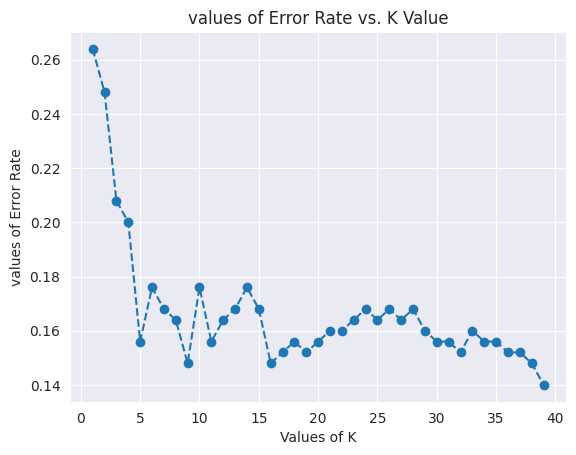

[0.264, 0.248, 0.20799999999999996, 0.19999999999999996, 0.15600000000000003, 0.17600000000000005, 0.16800000000000004, 0.16400000000000003, 0.14800000000000002, 0.17600000000000005, 0.15600000000000003, 0.16400000000000003, 0.16800000000000004, 0.17600000000000005, 0.16800000000000004, 0.14800000000000002, 0.15200000000000002, 0.15600000000000003, 0.15200000000000002, 0.15600000000000003, 0.16000000000000003, 0.16000000000000003, 0.16400000000000003, 0.16800000000000004, 0.16400000000000003, 0.16800000000000004, 0.16400000000000003, 0.16800000000000004, 0.16000000000000003, 0.15600000000000003, 0.15600000000000003, 0.15200000000000002, 0.16000000000000003, 0.15600000000000003, 0.15600000000000003, 0.15200000000000002, 0.15200000000000002, 0.14800000000000002, 0.14]
Best k value: 39


In [ ]:
plt.plot(K_V, E_R,linestyle='dashed',marker='o')
plt.title('values of Error Rate vs. K Value') #this is my title for the line plot
plt.xlabel('Values of K')     #this line name the x axis as values of k
plt.ylabel('values of Error Rate')  #this line name the y axis as values of Error Rate
plt.grid(True) #this line gives me the grids in background
plt.show()
print(E_R)
kbest = K_V[E_R.index(min(E_R))] #selcting best k based on minimal error rate
print(f"Best k value: {kbest}")

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [ ]:
print("With k=39")
KNN_model = KNeighborsClassifier(n_neighbors=39)  #my knn model
KNN_model.fit(Xg_train, yg_train)                  #training the knn with new k=39
Yg_pred = KNN_model.predict(Xg_test)
c_matrix = confusion_matrix(yg_test, Yg_pred)      #confusion matrix
print(c_matrix)
report = classification_report(yg_test, Yg_pred)   #classification report
print(report)

With k=39
[[102  16]
 [ 19 113]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       118
           1       0.88      0.86      0.87       132

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

##ROC(**bonus**)

In [ ]:
from sklearn.metrics import roc_curve  #i am importing this function to get/compute the ROC curve
from sklearn.metrics import auc #Area Under the Curve
FPR, TPR, t = roc_curve(yg_test, Yg_pred)
roc_auc = auc(FPR, TPR)
print(roc_auc)

0.8602336928608114


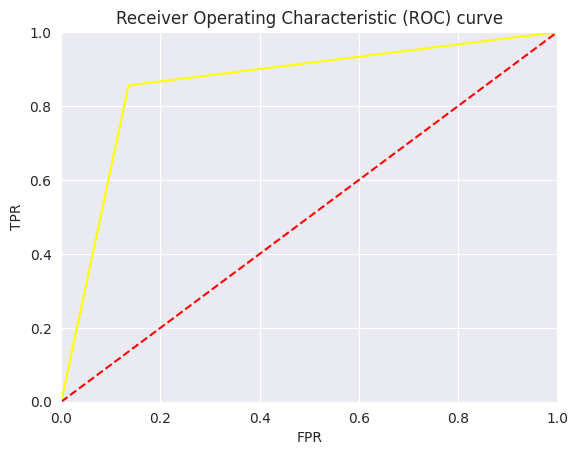

In [ ]:
plt.title('Receiver Operating Characteristic (ROC) curve') #title of the graph
plt.plot(FPR, TPR, 'yellow')
plt.grid(True)      #this line puts the grids in graph
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])    #xlim will remove the extra spaces in the graph in x axis
plt.ylim([0, 1])    #ylim will remove the extra spaces in the graph in y axis
plt.ylabel('TPR')   #name of the y axis
plt.xlabel('FPR')   #name of the x axis
plt.show()